<a href="https://colab.research.google.com/github/Indramawanciputra28/Data-Mining/blob/main/Implementasi_Python_dengan_dataset_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Import library yang dibutuhkan
import numpy as np  # Library untuk operasi array dan perhitungan numerik
from matplotlib import pyplot as plt  # Library untuk membuat plot visualisasi
from matplotlib.pyplot import cm  # Library untuk colormap (mewarnai klaster)
import time  # Library untuk pengaturan waktu (opsional, jika digunakan)
import itertools  # Library untuk kombinasi dan permutasi data (opsional)

# Baca dataset dari file
datasetPath = "dataaku.txt"  # Path ke file dataset (lokasi file pada direktori)
dataset = np.loadtxt(datasetPath, delimiter=" ")  # Membaca dataset dari file dengan delimiter spasi

# Mendefinisikan parameter K-Means klustering
k = 2  # Jumlah klaster yang diinginkan (dapat diubah sesuai kebutuhan)
iterationCounter = 0  # Counter untuk melacak jumlah iterasi (opsional)
input = dataset  # Menyimpan dataset ke variabel `input` untuk diproses

# Fungsi untuk inisialisasi titik pusat klaster (random)
def initCentroid(dataIn, k):
    result = dataIn[np.random.choice(dataIn.shape[0], k, replace=False)]
    # Memilih `k` titik secara acak dari dataset sebagai centroid awal
    return result  # Mengembalikan centroid awal


In [11]:
# Fungsi untuk plot hasil klaster per iterasi
def plotClusterResult(listClusterMembers, centroid, iteration, converged):
    n = listClusterMembers.__len__()  # Jumlah klaster
    color = iter(cm.rainbow(np.linspace(0, 1, n)))  # Generate warna untuk setiap klaster
    plt.figure("result")  # Membuat figur baru untuk plot
    plt.clf()  # Membersihkan figur sebelumnya
    plt.title("Iteration-" + iteration)  # Menambahkan judul dengan nomor iterasi
    marker = itertools.cycle(('.', '*', '^', 'x', '+'))  # Marker berbeda untuk setiap klaster

    for i in range(n):  # Loop untuk setiap klaster
        col = next(color)  # Ambil warna untuk klaster i
        memberCluster = np.asmatrix(listClusterMembers[i])  # Data anggota klaster i
        plt.scatter(np.ravel(memberCluster[:, 0]), np.ravel(memberCluster[:, 1]),
                    marker=marker.__next__(), s=100, c=col, label="klaster-" + str(i + 1))
        # Plot data klaster dengan warna dan marker

    for i in range(n):  # Loop untuk plot centroid
        plt.scatter((centroid[i, 0]), (centroid[i, 1]), marker=marker.__next__(),
                    c=col, label="centroid-" + str(i + 1))
        # Plot posisi centroid

    if converged == 0:  # Jika belum konvergen
        plt.legend()  # Tampilkan legenda
        plt.show()  # Tampilkan plot
        plt.pause(0.1)  # Pause selama 0.1 detik untuk melihat perubahan setiap iterasi

    if converged == 1:  # Jika sudah konvergen
        plt.legend()  # Tampilkan legenda
        plt.show(block=True)  # Plot final ditampilkan tanpa diinterupsi


In [12]:
# Fungsi utama algoritma K-Means
def kMeans(data, centroidInit):
    nCluster = k  # Banyaknya klaster
    global iterationCounter  # Gunakan variabel global untuk melacak jumlah iterasi
    centroidInit = np.matrix(centroidInit)  # Konversi centroid awal menjadi matriks

    # Looping hingga konvergen
    while(True):
        iterationCounter += 1  # Hitung iterasi
        euclideanMatrixAllCluster = np.ndarray(shape=(data.shape[0], 0))
        # Matrix untuk menyimpan jarak Euclidean ke setiap klaster

        # Ulangi proses untuk semua klaster
        for i in range(0, nCluster):
            centroidRepeated = np.repeat(centroidInit[i, :], data.shape[0], axis=0)
            # Ulangi centroid agar sesuai jumlah data
            deltaMatrix = abs(np.subtract(data, centroidRepeated))
            # Hitung perbedaan (delta) antara data dan centroid
            euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
            # Hitung jarak Euclidean
            euclideanMatrixAllCluster = np.concatenate((euclideanMatrixAllCluster, euclideanMatrix), axis=1)
            # Gabungkan jarak ke semua klaster

        # Tempatkan data ke klaster yang jarak Euclideannya paling dekat
        clusterMatrix = np.ravel(np.argmin(np.matrix(euclideanMatrixAllCluster), axis=1))
        # Tentukan klaster dengan jarak minimum
        listClusterMember = [[] for i in range(k)]
        # Buat list kosong untuk setiap klaster

        for i in range(0, data.shape[0]):  # Loop untuk setiap data
            listClusterMember[clusterMatrix[i].item()].append(data[i, :])
            # Tambahkan data ke klaster berdasarkan matriks klaster

        # Hitung titik pusat klaster terbaru
        newCentroid = np.ndarray(shape=(0, centroidInit.shape[1]))
        # Array untuk menyimpan centroid baru
        for i in range(0, nCluster):
            memberCluster = np.asmatrix(listClusterMember[i])  # Data anggota klaster i
            centroidCluster = memberCluster.mean(axis=0)  # Hitung rata-rata klaster
            newCentroid = np.concatenate((newCentroid, centroidCluster), axis=0)
            # Tambahkan centroid baru ke matriks centroid

        print("Iter: ", iterationCounter)  # Cetak iterasi saat ini
        print("Centroid: ", newCentroid)  # Cetak centroid baru

        # Break dari loop jika sudah konvergen
        if((centroidInit == newCentroid).all()):  # Jika centroid tidak berubah
            break  # Keluar dari loop

        # Update titik pusat klaster dengan nilai yang baru
        centroidInit = newCentroid

        # Plot hasil klaster per iterasi
        plotClusterResult(listClusterMember, centroidInit, str(iterationCounter), 0)
        time.sleep(1)  # Tunda 1 detik agar hasil plot klaster nyaman dilihat

    return listClusterMember, centroidInit  # Kembalikan anggota klaster dan centroid final


Iter:  1
Centroid:  [[-1.78350716  0.04199254]
 [10.64809846 -3.01163231]]


<ipython-input-11-a56f85d687ef>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(np.ravel(memberCluster[:, 0]), np.ravel(memberCluster[:, 1]),
<ipython-input-11-a56f85d687ef>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((centroid[i, 0]), (centroid[i, 1]), marker=marker.__next__(),


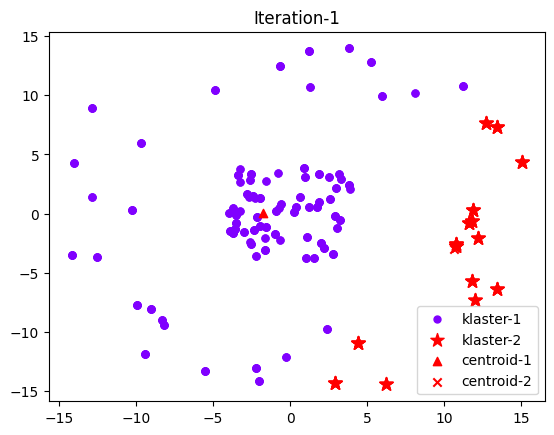

Iter:  2
Centroid:  [[-2.00198267 -0.15028298]
 [10.60991268 -1.86261268]]


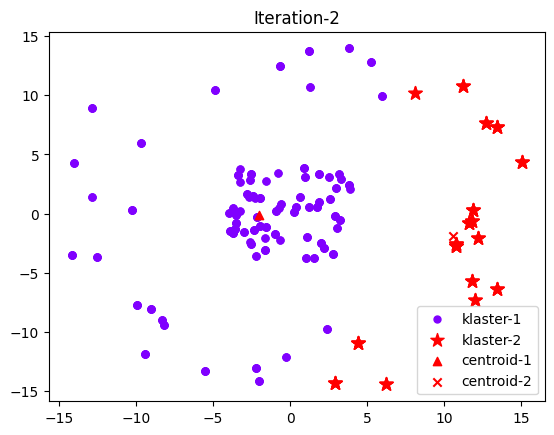

Iter:  3
Centroid:  [[-2.10007354 -0.27434185]
 [10.36233867 -1.2337    ]]


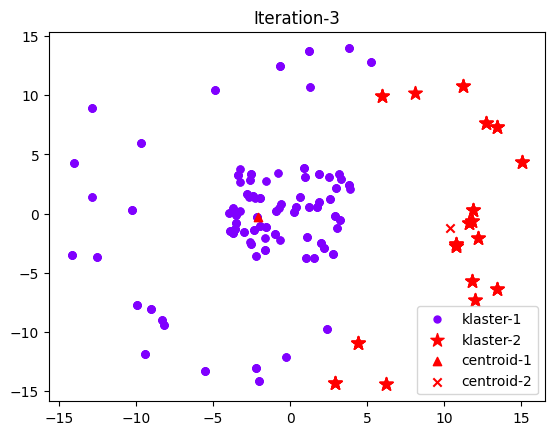

Iter:  4
Centroid:  [[-2.11375368 -0.6498865 ]
 [10.59101622  0.40776216]]


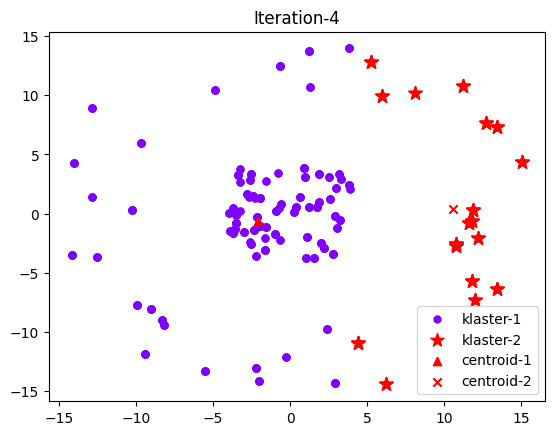

Iter:  5
Centroid:  [[-2.08629633 -0.98623609]
 [10.64206027  1.92891233]]


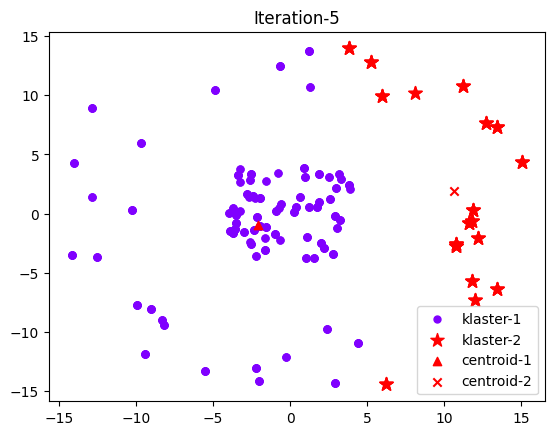

Iter:  6
Centroid:  [[-2.01083364 -1.10862576]
 [10.83180857  2.63082714]]


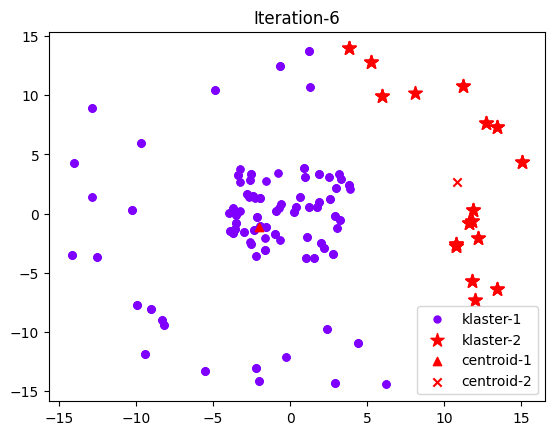

Iter:  7
Centroid:  [[-2.06027877 -1.33717231]
 [10.18989467  3.37189867]]


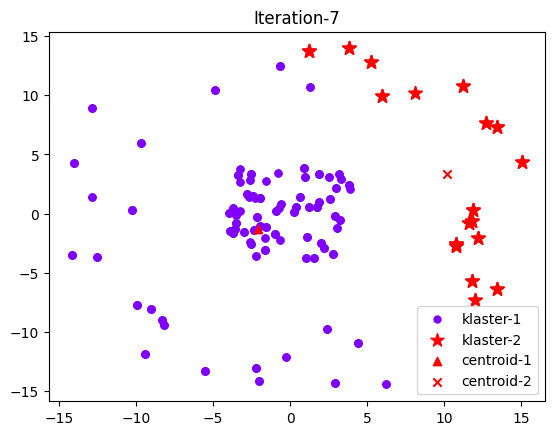

Iter:  8
Centroid:  [[-2.27468974 -1.5805016 ]
 [ 9.14039432  3.53895341]]


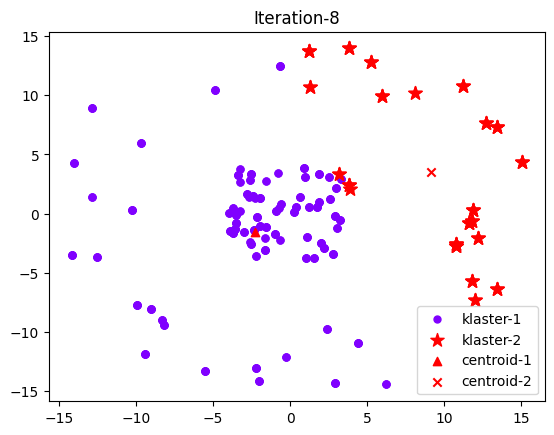

Iter:  9
Centroid:  [[-2.47746296 -1.9600468 ]
 [ 8.06269903  3.88781845]]


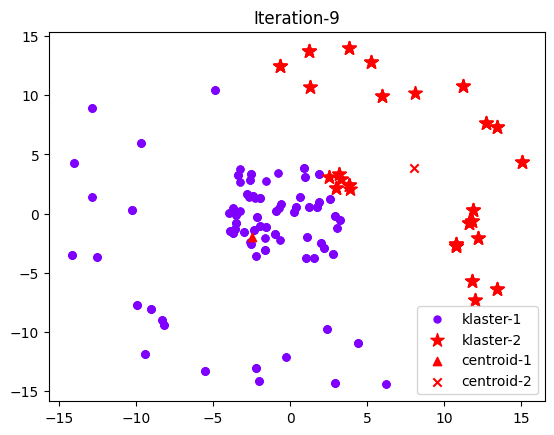

Iter:  10
Centroid:  [[-2.55244007 -2.05067432]
 [ 7.77744444  3.86211389]]


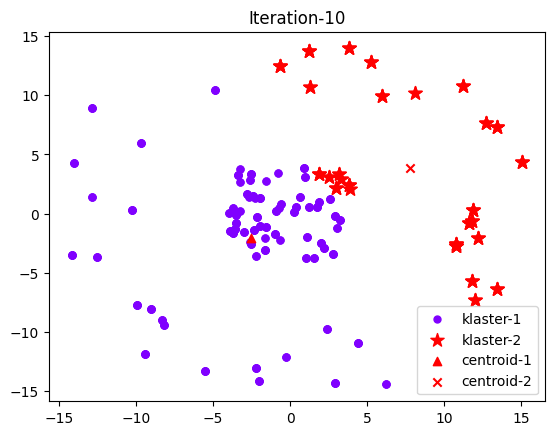

Iter:  11
Centroid:  [[-2.62417674 -2.09592118]
 [ 7.59298571  3.76729196]]


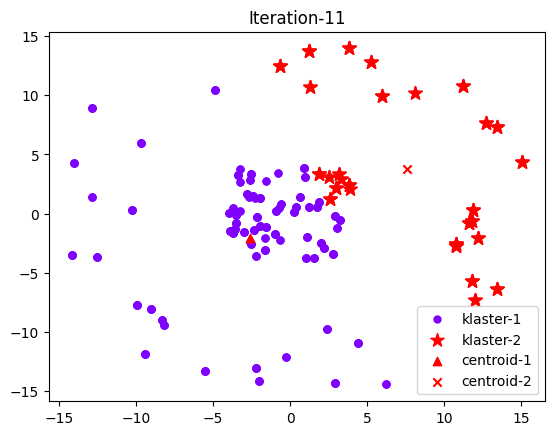

Iter:  12
Centroid:  [[-2.68602968 -2.20164064]
 [ 7.30596496  3.77244188]]


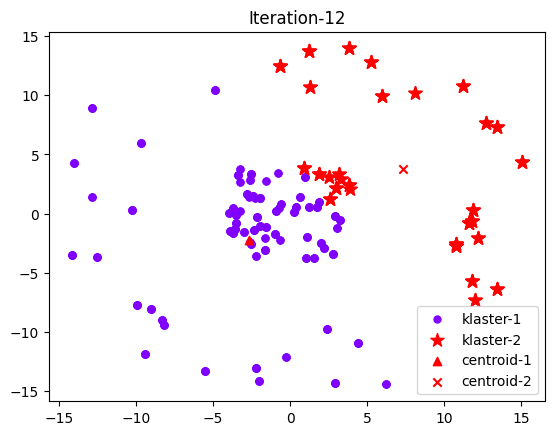

Iter:  13
Centroid:  [[-2.82503709 -2.30161273]
 [ 6.9722936   3.6100392 ]]


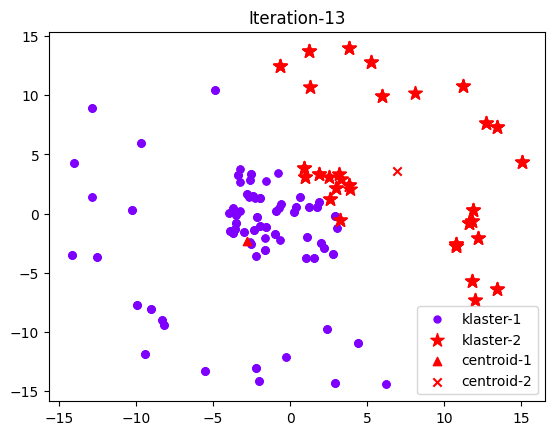

Iter:  14
Centroid:  [[-3.00348684 -2.39034098]
 [ 6.6685      3.38912015]]


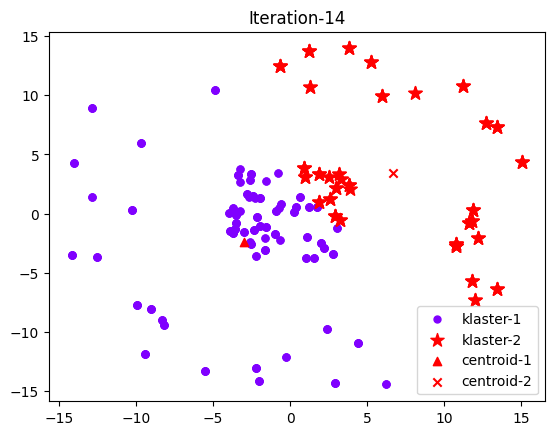

Iter:  15
Centroid:  [[-3.0724251  -2.40386882]
 [ 6.58904599  3.28853212]]


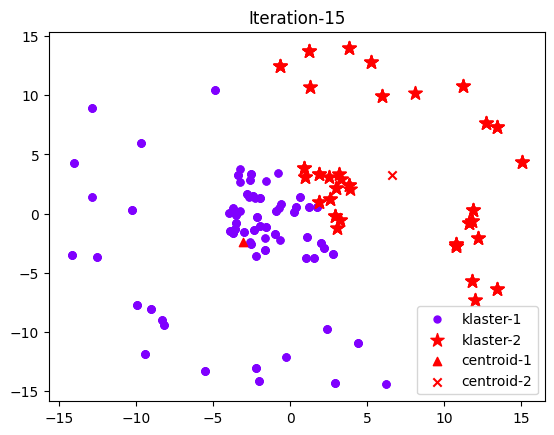

Iter:  16
Centroid:  [[-3.16601667 -2.46050581]
 [ 6.4189      3.1909993 ]]


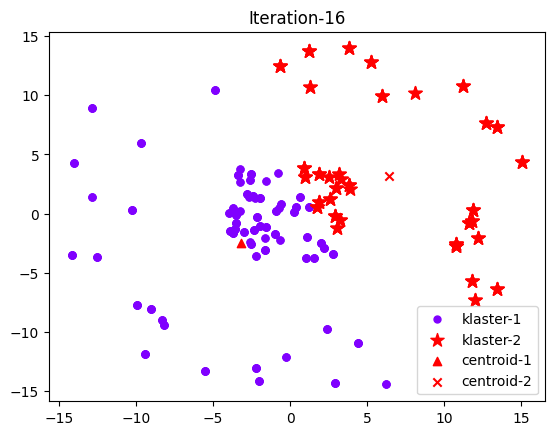

Iter:  17
Centroid:  [[-3.16601667 -2.46050581]
 [ 6.4189      3.1909993 ]]


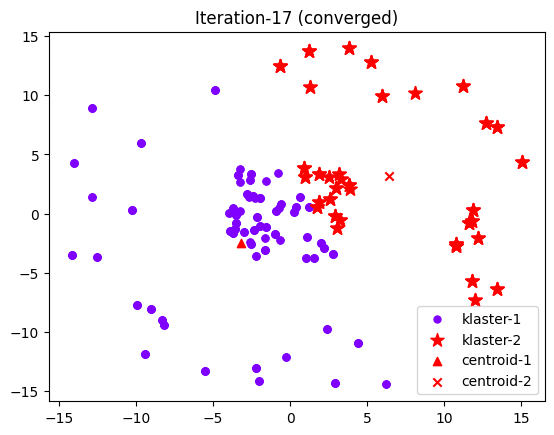

In [13]:
# Panggil fungsi inisialisasi klaster
centroidInit = initCentroid(input, k)
# Inisialisasi titik pusat klaster awal secara random menggunakan fungsi `initCentroid`

# Panggil fungsi K-Means
clusterResults, centroid = kMeans(input, centroidInit)
# Jalankan algoritma K-Means untuk mendapatkan hasil klaster dan posisi centroid final

# Plot hasil final klaster setelah konvergen
plotClusterResult(clusterResults, centroid, str(iterationCounter) + " (converged)", 1)
# Visualisasikan hasil akhir klaster setelah algoritma mencapai konvergensi
